<a href="https://colab.research.google.com/github/P-Dammy/A-Two-Model-Ensemble-Approach-for-Fraud-Detection-Using-GaussianNB-and-Random-Forest-Classifier/blob/main/A_Two_Model_Ensemble_Approach_for_Fraud_Detection_Using_GaussianNB_and_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a Two-Model Ensemble Approach for Fraud Detection Using GaussianNB and Random Forest Classifier.

The approach involves selecting a machine learning model with the best clasification accuracy on the training and test data set. Another machine learnng model with a different internal algorithm structure is selected to perform another classification task on the misclassified data points of the first model. The predicting capacity of the two models are then linearly combined. This new combined model has a classification accuracy significantly superior to each of the combining models individually.

The data set used for this is a data on fraudulent transactions gotten from internet. The data was preprocesses and exploratory analysis was first carried out on the data.

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Bringing in the data

df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
# Checking out what the data looks like

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Checking the column names

print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
# Checking the different transaction types contained in the data

df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
# checking for missing data

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.isFraud.unique()

array([0, 1], dtype=int64)

# Descriptive Analysis

In [ ]:
# Checking out the sum of each transaction types

data = print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


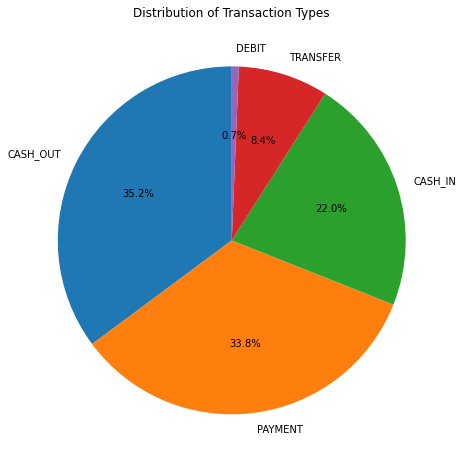

In [ ]:
# Pie chart representation of the transaction types

type_counts = df["type"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Transaction Types")
plt.show()

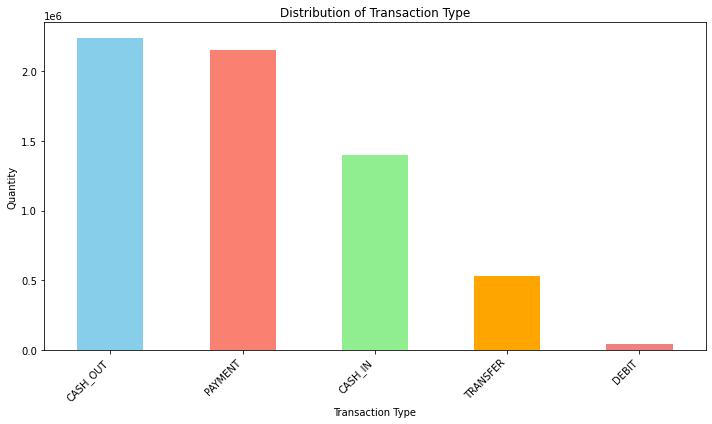

In [ ]:
#Bar chart representation of trasaction volume by types.

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color=colors)
plt.xlabel('Transaction Type')
plt.ylabel('Quantity')
plt.title('Distribution of Transaction Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot above reveals that there were Five different transactions that took place, namely  Cash out, payment, Cash_in, Transfer and debit with the percentage occurence of 35.2%,33.8%,22.0%, 8.4% and 0.7% respectively.The result of this description further reveals that the cash_out transaction had the highest number of occurence while debit transaction has the lowest.

In [ ]:
# Descriptive statistics of the data

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,243.40,142.33,1.0,156.00,239.00,335.00,7.430000e+02
amount,6362620.0,179861.90,603858.23,0.0,13389.57,74871.94,208721.48,9.244552e+07
oldbalanceOrg,6362620.0,833883.10,2888242.67,0.0,0.00,14208.00,107315.18,5.958504e+07
newbalanceOrig,6362620.0,855113.67,2924048.50,0.0,0.00,0.00,144258.41,4.958504e+07
oldbalanceDest,6362620.0,1100701.67,3399180.11,0.0,0.00,132705.66,943036.71,3.560159e+08
newbalanceDest,6362620.0,1224996.40,3674128.94,0.0,0.00,214661.44,1111909.25,3.561793e+08
isFraud,6362620.0,0.00,0.04,0.0,0.00,0.00,0.00,1.000000e+00
isFlaggedFraud,6362620.0,0.00,0.00,0.0,0.00,0.00,0.00,1.000000e+00


From the result of descriptive analysis,it was discovered that the total number of transactions that took place was 6362620.00, the average amount involved in any transaction was 179861.90, the minimum amount was 0.00, while the maximum amount was 92445516.64. The result further shows the average balance in the origin account before the transaction occured was 833883.10, the minimum balance was 0.00 while the maximum was 59585040.37, the average account balance in the origin account after the occurence of transaction was 855113.67, the minimum balance was 0.00, while the maximum was 144258.41. Conversely, the result shows that the average balance in the destination account before any transactions was 1.100702e+06, the minimum was 0.000000e+00, while the maximum was 3.560159e+08, the average balance in the destination account after transaction was 1.224996e+06, the minimum  balance was 0.000000e+00, while the maximum was 3.561793e+08.

# Description of target variabe

In [ ]:
# Ckecking the value caount for fraud and non-fraud transactions

df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Data Transformation & Correlation Analysis

In [ ]:
# Representing the transaction types with numbers

df.replace(to_replace=['PAYMENT','TRANSFER','CASH_OUT', 'DEBIT','CASH_IN'],value=[2,4,1,5,3],inplace=True)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
# Checking for inter-features correlation to identify features that are highly correlated with one another

df_corr = df.drop(["nameDest", "nameOrig"], axis = 1)

df_corr.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

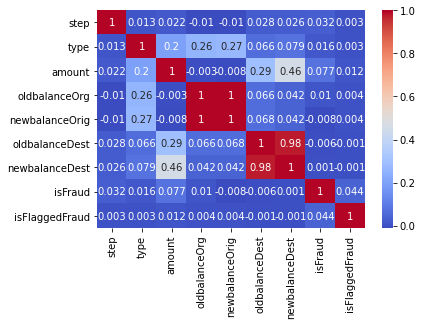

In [ ]:
sns.heatmap(df_corr.corr().round(3), annot= True, cmap='coolwarm')

From the result of corrlation analysis, it was discovered that all the variables involved in this analysis possess some level of correlation or relationship with fraud possibility(positive or negative); amount, oldbalanceorig, newbalancedest had a positive correlation with fraud possibility while newbalanceorig, oldbalancedest has a negative correlation with fraud possibility.

In [ ]:
# Creating a dictionary for mapping integers to the strings in the target variable
fraud_mapping = {0: 'No fraud', 1: 'Fraud'}

# Applying the mapping to 'isFraud' (target) column
df['isFraud'] = df['isFraud'].map(fraud_mapping)


In [ ]:
# Checking the unique values in the target variable to ensure that all in mapped correctly

df.isFraud.unique()

array(['No fraud', 'Fraud'], dtype=object)

## Handling the imbalance in the dataset, to generate a balanced dataset

In [ ]:
# Printing the counts of fraud and non-fraud cases in the original dataset to show the imbalance
print("Original Class Distribution:")
print(df['isFraud'].value_counts())

# Separating fraud and non-fraud cases
fraud_cases = df[df['isFraud'] == 'Fraud']
non_fraud_cases = df[df['isFraud'] == 'No fraud']

# Printing the counts of fraud and non-fraud cases before resampling
print("Before Resampling:")
print("Fraud cases:", len(fraud_cases))
print("Non-fraud cases:", len(non_fraud_cases))

# Randomly sampling non-fraud cases to balance the dataset
non_fraud_sampled = non_fraud_cases.sample(n=len(fraud_cases), random_state=42)

# Combining the sampled non-fraud cases with fraud cases to create the balanced dataset
balanced_df = pd.concat([fraud_cases, non_fraud_sampled])

# Shuffling the entire dataset to mix the order of samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Printing the counts of fraud and non-fraud cases after resampling
print("After Resampling:")
print("Fraud cases:", len(balanced_df[balanced_df['isFraud'] == 'Fraud']))
print("Non-fraud cases:", len(balanced_df[balanced_df['isFraud'] == 'No fraud']))

# Printing the first few entries in the DataFrame to check
print(balanced_df.head())

# Overwrite the entire dataset with the balanced values
df_resampled = balanced_df.copy()

Original Class Distribution:
isFraud
No fraud    6354407
Fraud          8213
Name: count, dtype: int64
Before Resampling:
Fraud cases: 8213
Non-fraud cases: 6354407
After Resampling:
Fraud cases: 8213
Non-fraud cases: 8213
   step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   397     3    76550.74   C658247527     1096252.93      1172803.66   
1   251     2    12617.11  C1812418129      339181.87       326564.76   
2    98     1     8055.06  C1544350298        8055.06            0.00   
3   550     4   342309.91   C662184778      342309.91            0.00   
4   586     1  2581549.92   C648614053     2581549.92            0.00   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0   C492670573      2208784.02      2132233.28  No fraud               0  
1  M1924423059            0.00            0.00  No fraud               0  
2   C912405348            0.00         8055.06     Fraud               0  
3  C1740503020            0.00        

# Description of target variable After Resampling

In [ ]:
# Checking the value counts of the target variable after balancing and resampling

df_resampled.isFraud.value_counts()

isFraud
No fraud    8213
Fraud       8213
Name: count, dtype: int64

In [ ]:
# Checking if there are missing cases in the new balanced dataset

df_resampled.isFraud.isna().sum()

0

# Machine Learning Tasks

GaussianNB model was used for the first model while random forest classifier was used for the second model

In [ ]:
# Importing the necessary libraries for the machine learning task

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Dividing the balanced dataset into the features (X) and target (Y) datasets

X = df_resampled[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
Y = df_resampled.isFraud

In [ ]:
# Printing out X (the predictors)

X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,3,76550.74,1096252.93,1172803.66,2208784.02,2132233.28,0
1,2,12617.11,339181.87,326564.76,0.00,0.00,0
2,1,8055.06,8055.06,0.00,0.00,8055.06,0
3,4,342309.91,342309.91,0.00,0.00,0.00,0
4,1,2581549.92,2581549.92,0.00,0.00,2581549.92,0
...,...,...,...,...,...,...,...
16421,1,542461.74,0.00,0.00,1757516.20,2299977.94,0
16422,3,2032.93,7625673.00,7627705.93,323961.50,321928.56,0
16423,1,156220.74,156220.74,0.00,0.00,156220.74,0
16424,4,1871553.73,1871553.73,0.00,0.00,0.00,0


In [ ]:
# Printing out Y (The target variable)

Y

0        No fraud
1        No fraud
2           Fraud
3           Fraud
4           Fraud
           ...   
16421    No fraud
16422    No fraud
16423       Fraud
16424       Fraud
16425    No fraud
Name: isFraud, Length: 16426, dtype: object

In [ ]:
# Splitting the X and Y datasets into train and test sets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### GaussianNB model on Raw data

Training the Gaussinam Model with the raw data and checking the accuracy on the train and test datasets.

In [ ]:
# Training the Gaussian model with the raw data

Raw_model = GaussianNB().fit(X_train,Y_train)

In [ ]:
# Predicting the training target variable data using the gaussian model

train_ypred_raw = Raw_model.predict(X_train)

In [ ]:
# Predicting the test target variable data using the gaussian model

y_pred_raw = Raw_model.predict(X_test)

In [ ]:
# Perfomance of model  on Training Dataset

print(accuracy_score(Y_train,train_ypred_raw))
print(classification_report(Y_train,train_ypred_raw))
print(confusion_matrix(Y_train,train_ypred_raw))

0.6568968516263698
              precision    recall  f1-score   support

       Fraud       0.94      0.33      0.49      5729
    No fraud       0.60      0.98      0.74      5769

    accuracy                           0.66     11498
   macro avg       0.77      0.66      0.62     11498
weighted avg       0.77      0.66      0.62     11498

[[1905 3824]
 [ 121 5648]]


In [ ]:
# Perfomance of model  on Test Dataset

print(accuracy_score(Y_test,y_pred_raw))
print(classification_report(Y_test,y_pred_raw))
print(confusion_matrix(Y_test,y_pred_raw))

0.648336038961039
              precision    recall  f1-score   support

       Fraud       0.96      0.32      0.48      2484
    No fraud       0.59      0.99      0.74      2444

    accuracy                           0.65      4928
   macro avg       0.77      0.65      0.61      4928
weighted avg       0.77      0.65      0.60      4928

[[ 786 1698]
 [  35 2409]]


## Improving the Gaussian model by engineering new features

Generating three new features:
1. amount_relative_to_balance_orig
2. newbalanceDest_rank
3. average_transaction_amount_dest

In [ ]:
# Features engineering

df_resampled['amount_relative_to_balance_orig'] = df_resampled['amount'] / (df_resampled['oldbalanceOrg'] + 0.1)
df_resampled['newbalanceDest_rank'] = df_resampled.groupby('nameDest')['newbalanceDest'].rank()
df_resampled['average_transaction_amount_dest']= df_resampled.groupby('nameDest')['amount'].transform('mean')

In [ ]:
# Printing out the new dataset with engineered features

df_resampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_relative_to_balance_orig,newbalanceDest_rank,average_transaction_amount_dest
0,397,3,76550.74,C658247527,1096252.93,1172803.66,C492670573,2208784.02,2132233.28,No fraud,0,6.982944e-02,1.0,76550.74
1,251,2,12617.11,C1812418129,339181.87,326564.76,M1924423059,0.00,0.00,No fraud,0,3.719865e-02,1.0,12617.11
2,98,1,8055.06,C1544350298,8055.06,0.00,C912405348,0.00,8055.06,Fraud,0,9.999876e-01,1.0,8055.06
3,550,4,342309.91,C662184778,342309.91,0.00,C1740503020,0.00,0.00,Fraud,0,9.999997e-01,1.0,342309.91
4,586,1,2581549.92,C648614053,2581549.92,0.00,C213455810,0.00,2581549.92,Fraud,0,1.000000e+00,1.0,2581549.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,382,1,542461.74,C664480557,0.00,0.00,C1725191429,1757516.20,2299977.94,No fraud,0,5.424617e+06,1.0,542461.74
16422,40,3,2032.93,C1544432489,7625673.00,7627705.93,C1918821785,323961.50,321928.56,No fraud,0,2.665902e-04,1.0,2032.93
16423,484,1,156220.74,C389614238,156220.74,0.00,C643171110,0.00,156220.74,Fraud,0,9.999994e-01,1.0,156220.74
16424,71,4,1871553.73,C677678546,1871553.73,0.00,C646623849,0.00,0.00,Fraud,0,9.999999e-01,1.0,1871553.73


## Retraining the gaussian model

In [ ]:
# Dividing the dataset with new features into the features (X) and target (Y) datasets

X = df_resampled[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','amount_relative_to_balance_orig','newbalanceDest_rank','average_transaction_amount_dest']]
Y = df_resampled.isFraud

In [ ]:
# Splitting the X and Y datasets into train and test sets.

X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
# Training the gaussian model

First_model = GaussianNB().fit(X_train,Y_train)

In [ ]:
# Predicting the target variable of training dataset with the trained model

y_train_pred = First_model.predict(X_train)

In [ ]:
# Determining the performance of the model on the training set

First_accuracy_train= accuracy_score(Y_train,y_train_pred)
First_conf_matrix_train= confusion_matrix(Y_train, y_train_pred)
First_classification_report_train= classification_report(Y_train, y_train_pred)

In [ ]:
# Printing out the performance metrics of the model on the training set

print(f"Accuracy of First Model on training set:{First_accuracy_train:.4f}")
print("Training set Confusion Matrix(First_model):")
print(First_conf_matrix_train)
print(First_classification_report_train)

Accuracy of First Model on training set:0.7775
Training set Confusion Matrix(First_model):
[[4204 2345]
 [ 579 6012]]
              precision    recall  f1-score   support

       Fraud       0.88      0.64      0.74      6549
    No fraud       0.72      0.91      0.80      6591

    accuracy                           0.78     13140
   macro avg       0.80      0.78      0.77     13140
weighted avg       0.80      0.78      0.77     13140



The accuracy of the model trained after features engineering is better than that of the model trained with the raw data

In [ ]:
# Predicting the target variable of test/validation dataset with the trained model

y_val_pred = First_model.predict(X_val)

In [ ]:
# Determining the performance of the model on the test/validation set

First_accuracy = accuracy_score(Y_val,y_val_pred)
conf_matrix_First = confusion_matrix(Y_val, y_val_pred)
classification_report_First= classification_report(Y_val, y_val_pred)

In [ ]:
# Printing out the performance metrics of the model on the test/validation set

print(f"First Model Accuracy:{First_accuracy:.4f}")
print("Confusion Matrix(First_model):")
print(conf_matrix_First)
print(classification_report_First)

First Model Accuracy:0.7559
Confusion Matrix(First_model):
[[1022  642]
 [ 160 1462]]
              precision    recall  f1-score   support

       Fraud       0.86      0.61      0.72      1664
    No fraud       0.69      0.90      0.78      1622

    accuracy                           0.76      3286
   macro avg       0.78      0.76      0.75      3286
weighted avg       0.78      0.76      0.75      3286



The accuracy of the model trained after features engineering is better than that of the model trained with the raw data

## Subsetting out the misclassified data to be used for the training of the second model

In [ ]:
# Getting the indices of the misclassified data
error_indices = [i for i, (true_val, pred_val) in enumerate(zip(Y_val, y_val_pred)) if true_val != pred_val]

# Resetting index of X_val and Y_val
X_val_reset = X_val.reset_index(drop=True)
Y_val_reset = Y_val.reset_index(drop=True)

# Using the reset indices to extract X_improve and y_improve (the features and target
# dataset to be used for training the second model)
X_improve = X_val_reset.loc[error_indices]
y_improve = Y_val_reset.loc[error_indices]

# Checking the value counts of the target
y_improve.value_counts()

isFraud
Fraud       642
No fraud    160
Name: count, dtype: int64

In [ ]:
# Scaling the data to improve training

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_improved_scaled = scaler.fit_transform(X_improve)
X_val_scaled = scaler.transform(X_val)

In [ ]:
# Traing the randome forest classifier model

improved_model= RandomForestClassifier()
improved_model.fit(X_improved_scaled, y_improve)

RandomForestClassifier()

### Performing hyperparameter tunning to improve the random forest classifier model

In [ ]:
from sklearn.model_selection import GridSearchCV


# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=improved_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_improved_scaled, y_improve)

# Printing out the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model using the best parameters
best_rf_model = grid_search.best_estimator_

# Making predictions on the test set
predictions = best_rf_model.predict(X_val_scaled)

# Evaluating the model
accuracy = accuracy_score(Y_val, predictions)
print(f"Accuracy: {accuracy}")

# Printing out the classification report
print(classification_report(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.6454656116859403
              precision    recall  f1-score   support

       Fraud       0.59      0.98      0.74      1664
    No fraud       0.95      0.30      0.45      1622

    accuracy                           0.65      3286
   macro avg       0.77      0.64      0.60      3286
weighted avg       0.77      0.65      0.60      3286

[[1638   26]
 [1139  483]]


## Defining a function for linearly combining the two models

The function takes into consideration the strength of each model and returns the prediction of the stronger model for each of the cases predicted to be fraudulent or not.

In [ ]:
def combine_predictions(model1_preds, model2_preds):
    combined_preds = []

    if isinstance(model1_preds[0], str):
        model1_preds = ['Fraud' if pred == 'Fraud' else 'No fraud' for pred in model1_preds]
        model2_preds = ['Fraud' if pred == 'Fraud' else 'No fraud' for pred in model2_preds]

    # Appending results to the combined_preds array
    for pred1, pred2 in zip(model1_preds, model2_preds):
        if pred1 == 'Fraud' and pred2 == 'Fraud':
            combined_preds.append('Fraud')
        elif pred1 == 'No fraud' and pred2 == 'No fraud':
            combined_preds.append('No fraud')
        else:
            combined_preds.append('No fraud')

    return combined_preds



In [ ]:
# Predicting X-val with the first model
First_model_val_preds = First_model.predict(X_val)

# Predicting X-val_scaled with the second model
improved_model_val_preds = best_rf_model.predict(X_val_scaled)

# combining the predictions of the two medels with the combining function
combined_val_preds = combine_predictions(First_model_val_preds, improved_model_val_preds)


In [ ]:
# Calculating the classification metrics of the combined model.
combined_accuracy = accuracy_score(Y_val, combined_val_preds)
combined_matrix = confusion_matrix(Y_val, combined_val_preds)


In [ ]:
# Printing out the performance report of the combined model.

print("Confusion Matrix:")
print(combined_matrix)

print("\nClassification Report:")
print(classification_report(Y_val, combined_val_preds))

print("\nAccuracy:", combined_accuracy)


Confusion Matrix:
[[ 996  668]
 [   0 1622]]

Classification Report:
              precision    recall  f1-score   support

       Fraud       1.00      0.60      0.75      1664
    No fraud       0.71      1.00      0.83      1622

    accuracy                           0.80      3286
   macro avg       0.85      0.80      0.79      3286
weighted avg       0.86      0.80      0.79      3286


Accuracy: 0.7967133292757151


In [ ]:
# Saving the model into pkl files for future usage

import joblib

# Save the first model
joblib.dump(First_model, 'First_model.pkl')

# Save the improved model
joblib.dump(best_rf_model, 'Improved_model.pkl')

# Save the combine_predictions function
joblib.dump(combine_predictions, 'combine_predictions.pkl')


['combine_predictions.pkl']

In [ ]:
# Loading the models from the pkl files

# Load the first model
loaded_first_model = joblib.load('First_model.pkl')

# Load the improved model
loaded_improved_model = joblib.load('Improved_model.pkl')

# Load the combine_predictions function
loaded_combine_predictions = joblib.load('combine_predictions.pkl')

# Print the content of the loaded function
print(loaded_combine_predictions)


<function combine_predictions at 0x000001A217B5FE50>


## Defining the function to take in new data points, predict the fraud posibility of the transaction details using the combined model loaded from the pkl files and printing out the prediction

In [ ]:
import pickle

# Function to preprocess input data
def preprocess_input(data):
    # Convert 'type' feature to numerical encoding
    type_mapping = {'PAYMENT': 2, 'TRANSFER': 4, 'CASH_OUT': 1, 'DEBIT': 5, 'CASH_IN': 3}

    # Map the 'type' column to numerical values
    data['type'] = data['type'].map(type_mapping)

    # Return the preprocessed data
    return data

# Function to make predictions
def make_predictions(model1, model2, input_data):
    # Model1 and Model2 are placeholders for the two loaded models
    # Preprocess input data
    preprocessed_data = preprocess_input(input_data)

    # Making predictions using loaded models
    pred1 = model1.predict(preprocessed_data)
    pred2 = model2.predict(preprocessed_data)

    # Combining predictions using the loaded_combine_predictions function
    combined_preds = loaded_combine_predictions(pred1, pred2)

    return combined_preds

# Function to display prediction result
def display_prediction_result(result):
    if result[0] == 'Fraud':
        print("Predicted Result: Fraud")
    else:
        print("Predicted Result: No Fraud")


Utilizing the created functions for prediction of fraud possibility for a sample user input.

We start off by loading the models from the pkl files, carrying out the prediction and displaying the result

In [ ]:
# Loading the first model
with open('First_model.pkl', 'rb') as model_file:
    loaded_first_model = joblib.load(model_file)

# Loading the improved model
with open('Improved_model.pkl', 'rb') as model_file:
    loaded_improved_model = joblib.load(model_file)

# Loading the combine_predictions function
with open('combine_predictions.pkl', 'rb') as model_file:
    loaded_combine_predictions = joblib.load(model_file)

# Sample user input
user_input = {
    'type': 'TRANSFER',
    'amount': 76550.74,
    'oldbalanceOrg': 76550.74,
    'newbalanceOrig': 0,
    'oldbalanceDest': 2208784.02,
    'newbalanceDest': 2132233.28,
    'isFlaggedFraud': 1,
    'amount_relative_to_balance_orig': 1.1,
    'newbalanceDest_rank': 3.0,
    'average_transaction_amount_dest': 76550.74
}

# Converting user input (a dictionary) to a DataFrame
user_input_df = pd.DataFrame([user_input])

# Making predictions
result = make_predictions( loaded_first_model,loaded_improved_model, user_input_df)

# Displaying the predicted class labels directly
display_prediction_result(result)


Predicted Result: No Fraud


Hope you enjoyed the journey

## The End